In [93]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [94]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv("NSL_dataset.csv", header=None, names = col_names)



In [95]:
#split into features and outcomes

x = df.drop(['label'], axis = 1 )
y = df[['label']]

In [96]:
#turn categorical data into dummy variables 

dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

x = x.drop(['protocol_type','service','flag'], axis = 1)

#x = x.join(x)

In [97]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

#dummy variable trap 
x = merged.drop(['icmp'], axis = 1)

In [98]:
merged_1= pandas.concat([x, dummies_2], axis = 'columns')

#dummy variable trap 

x = merged_1.drop(['whois'], axis = 1)

In [99]:
merged_2= pandas.concat([x, dummies_3], axis = 'columns')

x = merged_2.drop(['SH'], axis = 1)

In [100]:
x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,1.616978,-0.053906,-0.031767,-0.019726,-1.211901
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.019113,-0.312889,-0.11205,-0.028606,-0.139982,-0.618438,-0.053906,-0.031767,-0.019726,0.825150


In [102]:
df.groupby('label')['label'].count()

label
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: label, dtype: int64

In [111]:
# take label column
#labeldf=df['label']
# change the label column
#newlabeldf=labeldf.replace({ 'normal' : 0,'back': 2,'buffer_overflow': 2, 'ftp_write': 2, 'guess_passwd': 2, 'imap': 2, 'ipsweep': 2, 
 #                           'land': 2, 'loadmodule': 2,'multihop': 2, 'neptune' : 1, 'nmap': 2, 'perl': 2, 'phf': 2, 'pod': 2, 'portsweep': 2, 
  #                          'processtable': 2, 'ps': 2, 'rootkit': 2, 'satan': 2, 'sendmail': 2,'smurf': 2,
   #                              'teardrop': 2,
    #                             'warezmaster': 2, 'spy': 2, 'warezclient': 2})

#df['label'] = newlabeldf
#print(df['label'].head())

In [103]:
# take label column
labeldf=df['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'apache2' : 2,'back': 2,'buffer_overflow': 2, 'ftp_write': 2, 'guess_passwd': 2, 'httptunnel': 2, 'imap': 2, 'ipsweep': 2, 
                            'land': 2, 'loadmodule': 2, 'mailbomb': 2, 'mscan': 2, 'multihop': 2, 'named': 2, 'neptune' : 1, 'nmap': 2, 'perl': 2, 'phf': 2, 'pod': 2, 'portsweep': 2, 
                            'processtable': 2, 'ps': 2, 'rootkit': 2, 'satan': 2, 'sendmail': 2,'smurf': 2,
                                 'snmpgetattack': 2,'snmpguess': 2,'sqlattack': 2,'teardrop': 2,'udpstorm': 2,
                                 'warezmaster': 2,'worm': 2,'xlock': 2,'xsnoop': 2,'xterm': 2, 'saint': 2, 'spy': 2, 'warezclient': 2})

df['label'] = newlabeldf
print(df['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [104]:
label_df=df['label']
newlabel_df=label_df.replace({ 0 : 'Normal', 1 : 'Neptune' , 2 : 'OtherAttacks'})

df['label'] = newlabel_df
print(df['label'].head())

0     Normal
1     Normal
2    Neptune
3     Normal
4     Normal
Name: label, dtype: object


In [105]:
df.groupby('label')['label'].count()

label
Neptune         41214
Normal          67343
OtherAttacks    17416
Name: label, dtype: int64

In [106]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [107]:
principalDf

,principal component 1,principal component 2
0,-1.006080,-0.191409
1,-0.261212,1.416883
2,4.368697,-1.687575
3,-2.733556,-0.946218
4,-2.585988,-0.819596
...,...,...
125968,4.401336,-1.679811
125969,-1.784793,-0.390181
125970,-0.872994,-0.718774
125971,4.507505,-1.928713


In [108]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

#finalDf = df[['label']].join(principalDf)

,principal component 1,principal component 2,label
0,-1.006080,-0.191409,Normal
1,-0.261212,1.416883,Normal
2,4.368697,-1.687575,Neptune
3,-2.733556,-0.946218,Normal
4,-2.585988,-0.819596,Normal


In [109]:
finalDf.groupby('label')['label'].count()

label
Neptune         41214
Normal          67343
OtherAttacks    17416
Name: label, dtype: int64

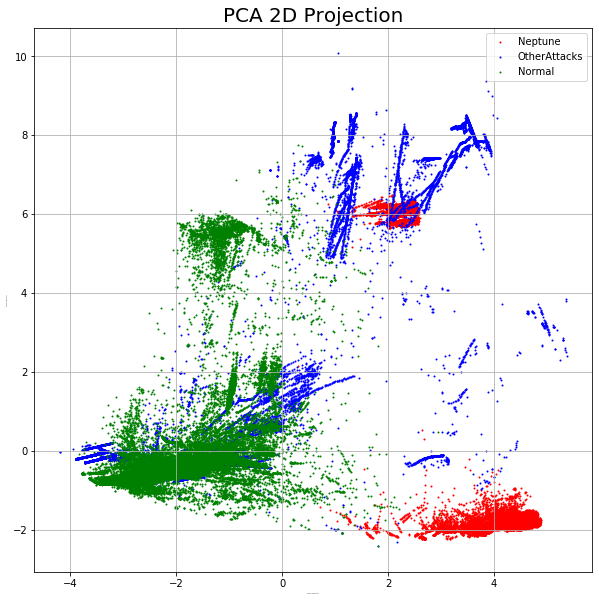

In [113]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 0)
ax.set_ylabel('Principal Component 2', fontsize = 0)
ax.set_title('PCA 2D Projection', fontsize = 20)
targets = ['Neptune','OtherAttacks','Normal']
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 1
              )
ax.legend(targets)
ax.grid()